In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, titlefontsize=10, tickfontsize=6, guidefontsize=10, legendfontsize=10)

In [2]:
function randxyz(; distz, distx, disty)
    z = rand(distz)
    x = rand(distx(z))
    y = rand(disty(x, z))
    x, y, z
end

function randxyz(n ;
        distz = 5 + Normal(), 
        distx = z -> z + Normal(),
        disty = (x, z) -> -x + 4z + Normal(),
    )
    stack(collect(randxyz(; distz, distx, disty)) for _ in 1:n)
end

randxyz (generic function with 2 methods)

fit(MvNormal, xyz) = FullNormal(
dim: 3
μ: [5.008633459492371, 14.946788770321094, 4.976700282227509]
Σ: [2.049291119333024 1.9578621336969075 1.0066923752860222; 1.9578621336969075 10.772808677768603 2.925263816212172; 1.0066923752860222 2.925263816212172 0.9827720078722486]
)

fit(Normal, z) = Normal{Float64}(μ=4.976700282227509, σ=0.9913485804056251)
c = [ones(n) z] \ x = [-0.08919817192451455, 1.0243396914260534]
fit(Normal, x - (c[1] .+ c[2] * z)) = Normal{Float64}(μ=2.327471548824178e-15, σ=1.009007513486187)
[ones(n) x z] \ y = [0.04242824312203415, -1.0201410629270404, 4.021514669036807]

fit(Normal, x) = Normal{Float64}(μ=5.008633459492371, σ=1.4315345330564073)
c = [ones(n) x] \ z = [2.5162625890634107, 0.4912393196793175]
fit(Normal, z - (c[1] .+ c[2] * x)) = Normal{Float64}(μ=1.831423901421658e-15, σ=0.6987453973446885)


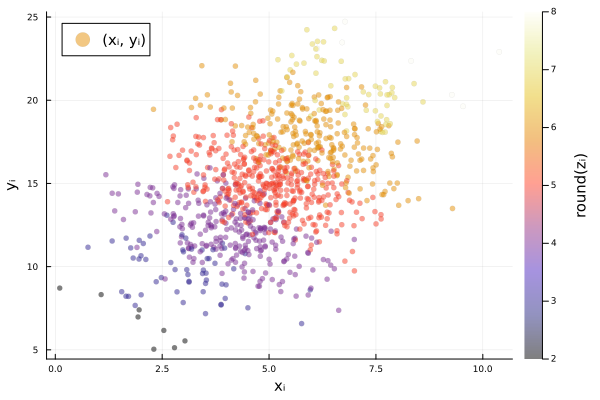

In [3]:
Random.seed!(4649373)
color = :CMRmap

n = 1000
xyz = randxyz(n)
x, y, z = eachrow(xyz)

@show fit(MvNormal, xyz)

@show fit(Normal, z)
@show c = [ones(n) z] \ x
@show fit(Normal, x - (c[1] .+ c[2]*z))
@show [ones(n) x z] \ y
println()
@show fit(Normal, x)
@show c = [ones(n) x] \ z
@show fit(Normal, z - (c[1] .+ c[2]*x))

scatter(x, y; label="(xᵢ, yᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
plot!(xguide="xᵢ", yguide="yᵢ", colorbar_title="round(zᵢ)")

a = A \ y = [10.161615156189079, 0.9553850671709938]


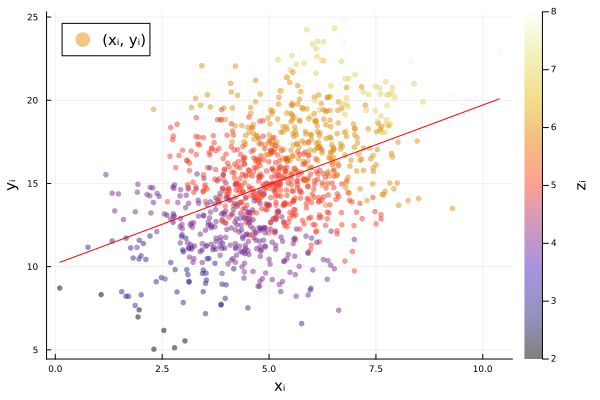

In [4]:
A = [ones(n) x]
@show a = A \ y

scatter(x, y; label="(xᵢ, yᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
plot!(xguide="xᵢ", yguide="yᵢ", colorbar_title="zᵢ")
plot!(x -> a[1] + a[2]*x; label="", c=:red)

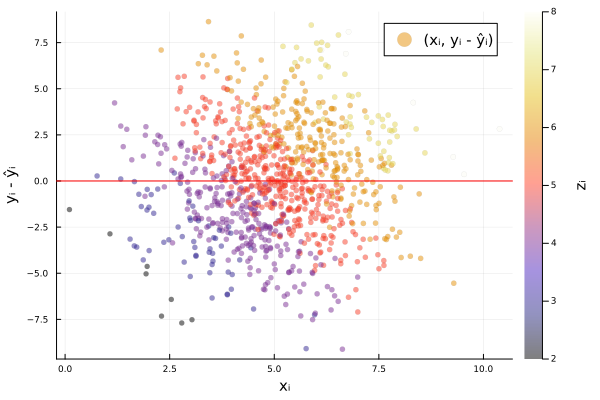

In [5]:
ŷ = @. a[1] + a[2]*x

scatter(x, y - ŷ; label="(xᵢ, yᵢ - ŷᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
plot!(xguide="xᵢ", yguide="yᵢ - ŷᵢ", colorbar_title="zᵢ")
hline!([0]; label="", c=:red)

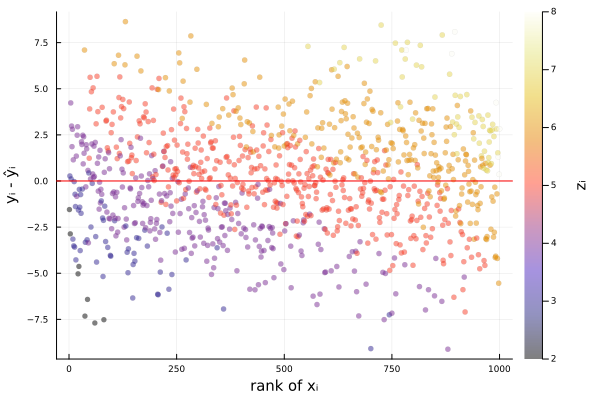

In [6]:
ŷ = @. a[1] + a[2]*x

perm = sortperm(x)
scatter(1:n, (y - ŷ)[perm]; label="", msw=0, alpha=0.5, ms=3, marker_z=round.(z[perm]), color)
plot!(xguide="rank of xᵢ", yguide="yᵢ - ŷᵢ", colorbar_title="zᵢ")
hline!([0]; label="", c=:red)

b = B \ y = [0.04242824312203415, -1.0201410629270404, 4.021514669036807]


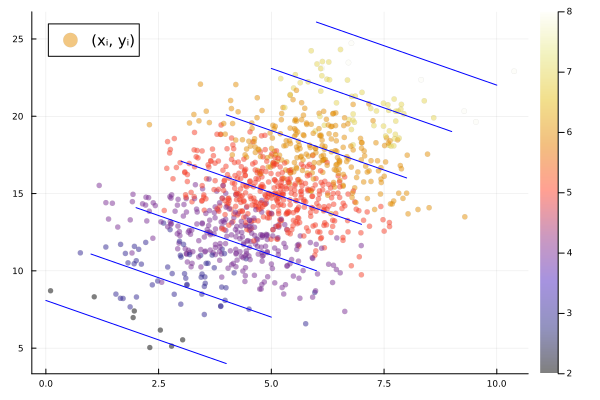

In [7]:
B = [ones(n) x z]
@show b = B \ y

scatter(x, y; label="(xᵢ, yᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
for z in range(round.(extrema(z))...)
    plot!(x -> b[1] + b[2]*x + b[3]*z, z-2, z+2; label="", c=:blue)
end
plot!()

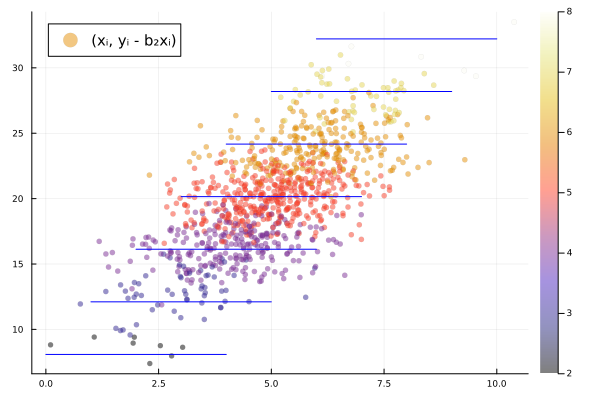

In [8]:
scatter(x, y - b[2]*x; label="(xᵢ, yᵢ - b₂xᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
for z in range(round.(extrema(z))...)
    plot!(x -> b[1] + b[3]*z, z-2, z+2; label="", c=:blue)
end
plot!()

In [9]:
function randxyz2(; distx, distz, disty)
    x = rand(distx)
    z = rand(distz(x))
    y = rand(disty(x, z))
    x, y, z
end

function randxyz2(n ;
        distx = 5 + Normal(0, √2), 
        distz = x -> 2.5 + 0.5x + Normal(0, 1/√2),
        disty = (x, z) -> -x + 4z + Normal(),
    )
    stack(collect(randxyz2(; distx, distz, disty)) for _ in 1:n)
end

randxyz2 (generic function with 2 methods)

fit(MvNormal, xyz) = FullNormal(
dim: 3
μ: [4.97605588583817, 15.016401119237084, 4.998156649194801]
Σ: [1.9577964158294405 1.9932395730495858 0.9769526142728908; 1.9932395730495858 11.978980818395994 3.212399665475502; 0.9769526142728908 3.212399665475502 1.0352444828507221]
)

fit(Normal, z) = Normal{Float64}(μ=4.998156649194801, σ=1.0174696471397677)
c = [ones(n) z] \ x = [0.25933216901119777, 0.9436926546883738]
fit(Normal, x - (c[1] .+ c[2] * z)) = Normal{Float64}(μ=2.9087843245179103e-16, σ=1.0177688390599848)
[ones(n) x z] \ y = [-0.2331136621960956, -1.0023410507690316, 4.048936695489504]

fit(Normal, x) = Normal{Float64}(μ=4.97605588583817, σ=1.3992127843289028)
c = [ones(n) x] \ z = [2.5150737468399815, 0.49900623291262663]
fit(Normal, z - (c[1] .+ c[2] * x)) = Normal{Float64}(μ=-9.534595335480843e-16, σ=0.7400939393538264)


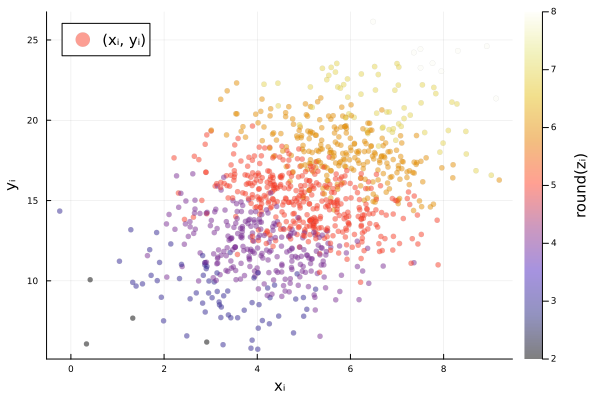

In [10]:
n = 1000
xyz = randxyz2(n)
x, y, z = eachrow(xyz)

@show fit(MvNormal, xyz)

@show fit(Normal, z)
@show c = [ones(n) z] \ x
@show fit(Normal, x - (c[1] .+ c[2]*z))
@show [ones(n) x z] \ y
println()
@show fit(Normal, x)
@show c = [ones(n) x] \ z
@show fit(Normal, z - (c[1] .+ c[2]*x))

scatter(x, y; label="(xᵢ, yᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
plot!(xguide="xᵢ", yguide="yᵢ", colorbar_title="round(zᵢ)")

a = A \ y = [9.950260723246576, 1.0181035969488852]


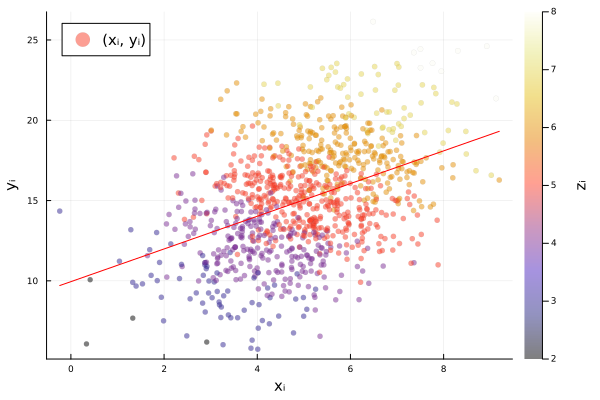

In [11]:
A = [ones(n) x]
@show a = A \ y

scatter(x, y; label="(xᵢ, yᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
plot!(xguide="xᵢ", yguide="yᵢ", colorbar_title="zᵢ")
plot!(x -> a[1] + a[2]*x; label="", c=:red)

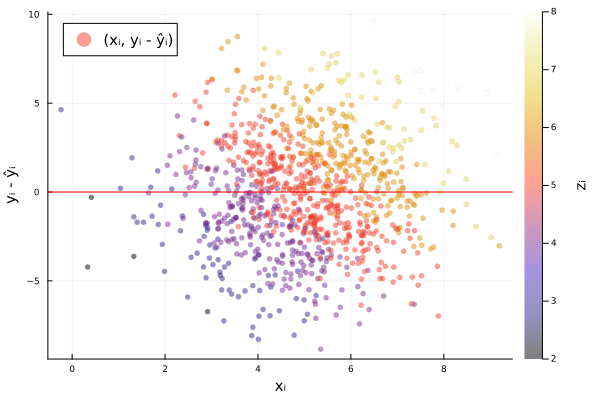

In [12]:
ŷ = @. a[1] + a[2]*x

scatter(x, y - ŷ; label="(xᵢ, yᵢ - ŷᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
plot!(xguide="xᵢ", yguide="yᵢ - ŷᵢ", colorbar_title="zᵢ")
hline!([0]; label="", c=:red)

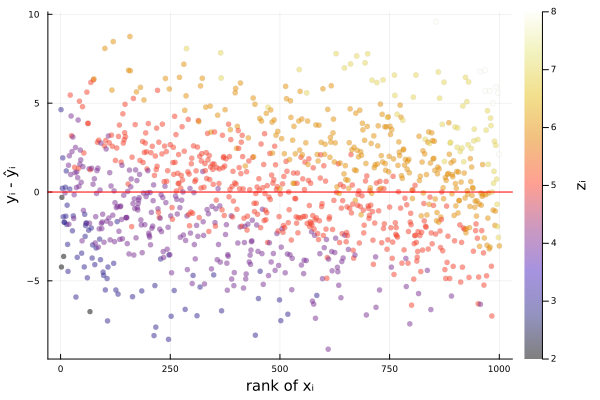

In [13]:
ŷ = @. a[1] + a[2]*x

perm = sortperm(x)
scatter(1:n, (y - ŷ)[perm]; label="", msw=0, alpha=0.5, ms=3, marker_z=round.(z[perm]), color)
plot!(xguide="rank of xᵢ", yguide="yᵢ - ŷᵢ", colorbar_title="zᵢ")
hline!([0]; label="", c=:red)

b = B \ y = [-0.2331136621960956, -1.0023410507690316, 4.048936695489504]


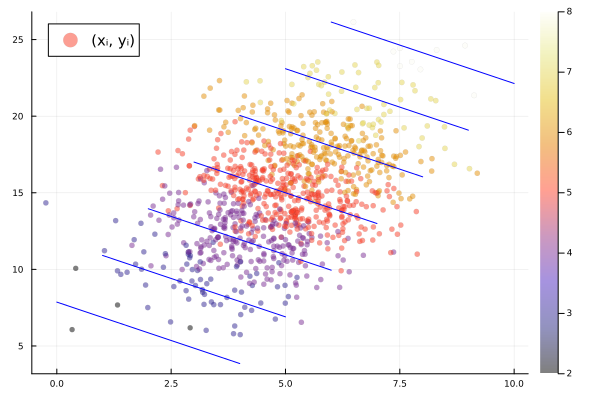

In [14]:
B = [ones(n) x z]
@show b = B \ y

scatter(x, y; label="(xᵢ, yᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
for z in range(round.(extrema(z))...)
    plot!(x -> b[1] + b[2]*x + b[3]*z, z-2, z+2; label="", c=:blue)
end
plot!()

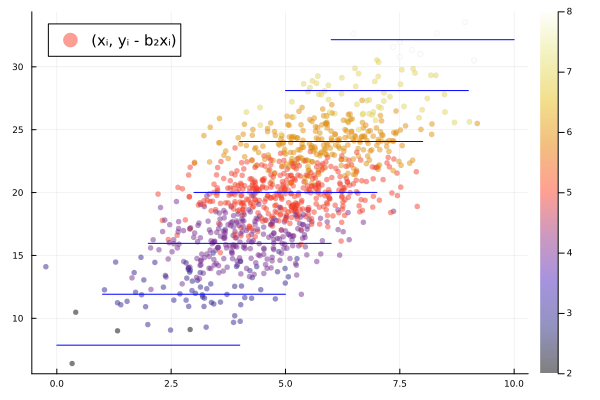

In [15]:
scatter(x, y - b[2]*x; label="(xᵢ, yᵢ - b₂xᵢ)", msw=0, alpha=0.5, ms=3, marker_z=round.(z), color)
for z in range(round.(extrema(z))...)
    plot!(x -> b[1] + b[3]*z, z-2, z+2; label="", c=:blue)
end
plot!()